In [ ]:
# import essential libraries
import matplotlib.pyplot as plt  # data-visualization
%matplotlib inline
import seaborn as sns  # built on top of matplotlib
sns.set()
import pandas as pd  # working with data frames
import plotly.express as px
import numpy as np  # scientific computing
import missingno as msno  # analysing missing data
import tensorflow as tf  # used to train deep neural network architectures
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Solar Power Plant Data.csv")

In [ ]:
df["Date-Hour(NMT)"] = df["Date-Hour(NMT)"].astype(np.datetime64)  # set the data type of the datetime column to np.datetime64
df.set_index("Date-Hour(NMT)", inplace=True)  # set the datetime columns to be the index
df.index.name = "datetime"  # change the name of the index

In [ ]:
# show the data frame
df.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
datetime,,,,,,,
2017-01-01 00:00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
2017-01-01 01:00:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2017-01-01 02:00:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
2017-01-01 03:00:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
2017-01-01 04:00:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [ ]:
df.tail()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
datetime,,,,,,,
2017-12-31 19:00:00,4.1,0,988.2,-4.8,-0.7,94,0.0
2017-12-31 20:00:00,2.1,0,987.3,-5.0,-0.3,95,0.0
2017-12-31 21:00:00,1.8,0,986.7,-5.3,0.2,93,0.0
2017-12-31 22:00:00,2.2,0,986.0,-5.4,0.3,92,0.0
2017-12-31 23:00:00,2.4,0,985.6,-5.9,0.4,96,0.0


# DATA WRANGLING

In [ ]:
# check the data frame for missing values and incorrect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WindSpeed            8760 non-null   float64
 1   Sunshine             8760 non-null   int64  
 2   AirPressure          8760 non-null   float64
 3   Radiation            8760 non-null   float64
 4   AirTemperature       8760 non-null   float64
 5   RelativeAirHumidity  8760 non-null   int64  
 6   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 547.5 KB


In [ ]:
# get the statistical summary
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


 More than 50% of the values of Radiation variable are negative where there is no energy generation. But these negative values seem to be due to mishandling of data because Radiation cannot have negative values (the instance where PV panels instead of sun emit radiation). So, setting these values to 0 isn't a bad option.

In [ ]:
# replace the negative values of `Radiation` by zero
df.loc[df.Radiation.lt(0), "Radiation"] = df.Radiation[df.Radiation < 0] * 0

# get the statistical summary
df.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,100.594087,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,180.614494,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-0.000000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-0.000000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-0.000000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [ ]:
df['hour'] = df.index.hour
df['day_of_year'] = df.index.dayofyear

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-01-01 00:00:00 to 2017-12-31 23:00:00
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WindSpeed            8760 non-null   float64
 1   Sunshine             8760 non-null   int64  
 2   AirPressure          8760 non-null   float64
 3   Radiation            8760 non-null   float64
 4   AirTemperature       8760 non-null   float64
 5   RelativeAirHumidity  8760 non-null   int64  
 6   SystemProduction     8760 non-null   float64
 7   hour                 8760 non-null   int64  
 8   day_of_year          8760 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 684.4 KB


# Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation between features')

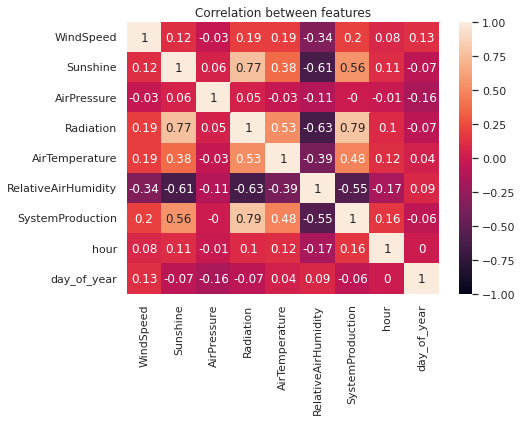

In [ ]:
sns.set()
_, ax = plt.subplots(figsize=(7, 5))

# plot the heatmap of correlations
fig = sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, ax=ax);

# set the title
fig.set_title("Correlation between features")



*   Radiation, Sunshine, RelativeAirHumidity, AirTemperature are be correlated which isn't surprising. It also indicates that there is multicollinearity in the dataset.
*  Radiation along with Sunshine shows positive correlation with SystemProduction which is an obvious discovery. Rest of the features don't seem to be correlated to SystemProduction. Further analysis will be performed to reach the conclusion

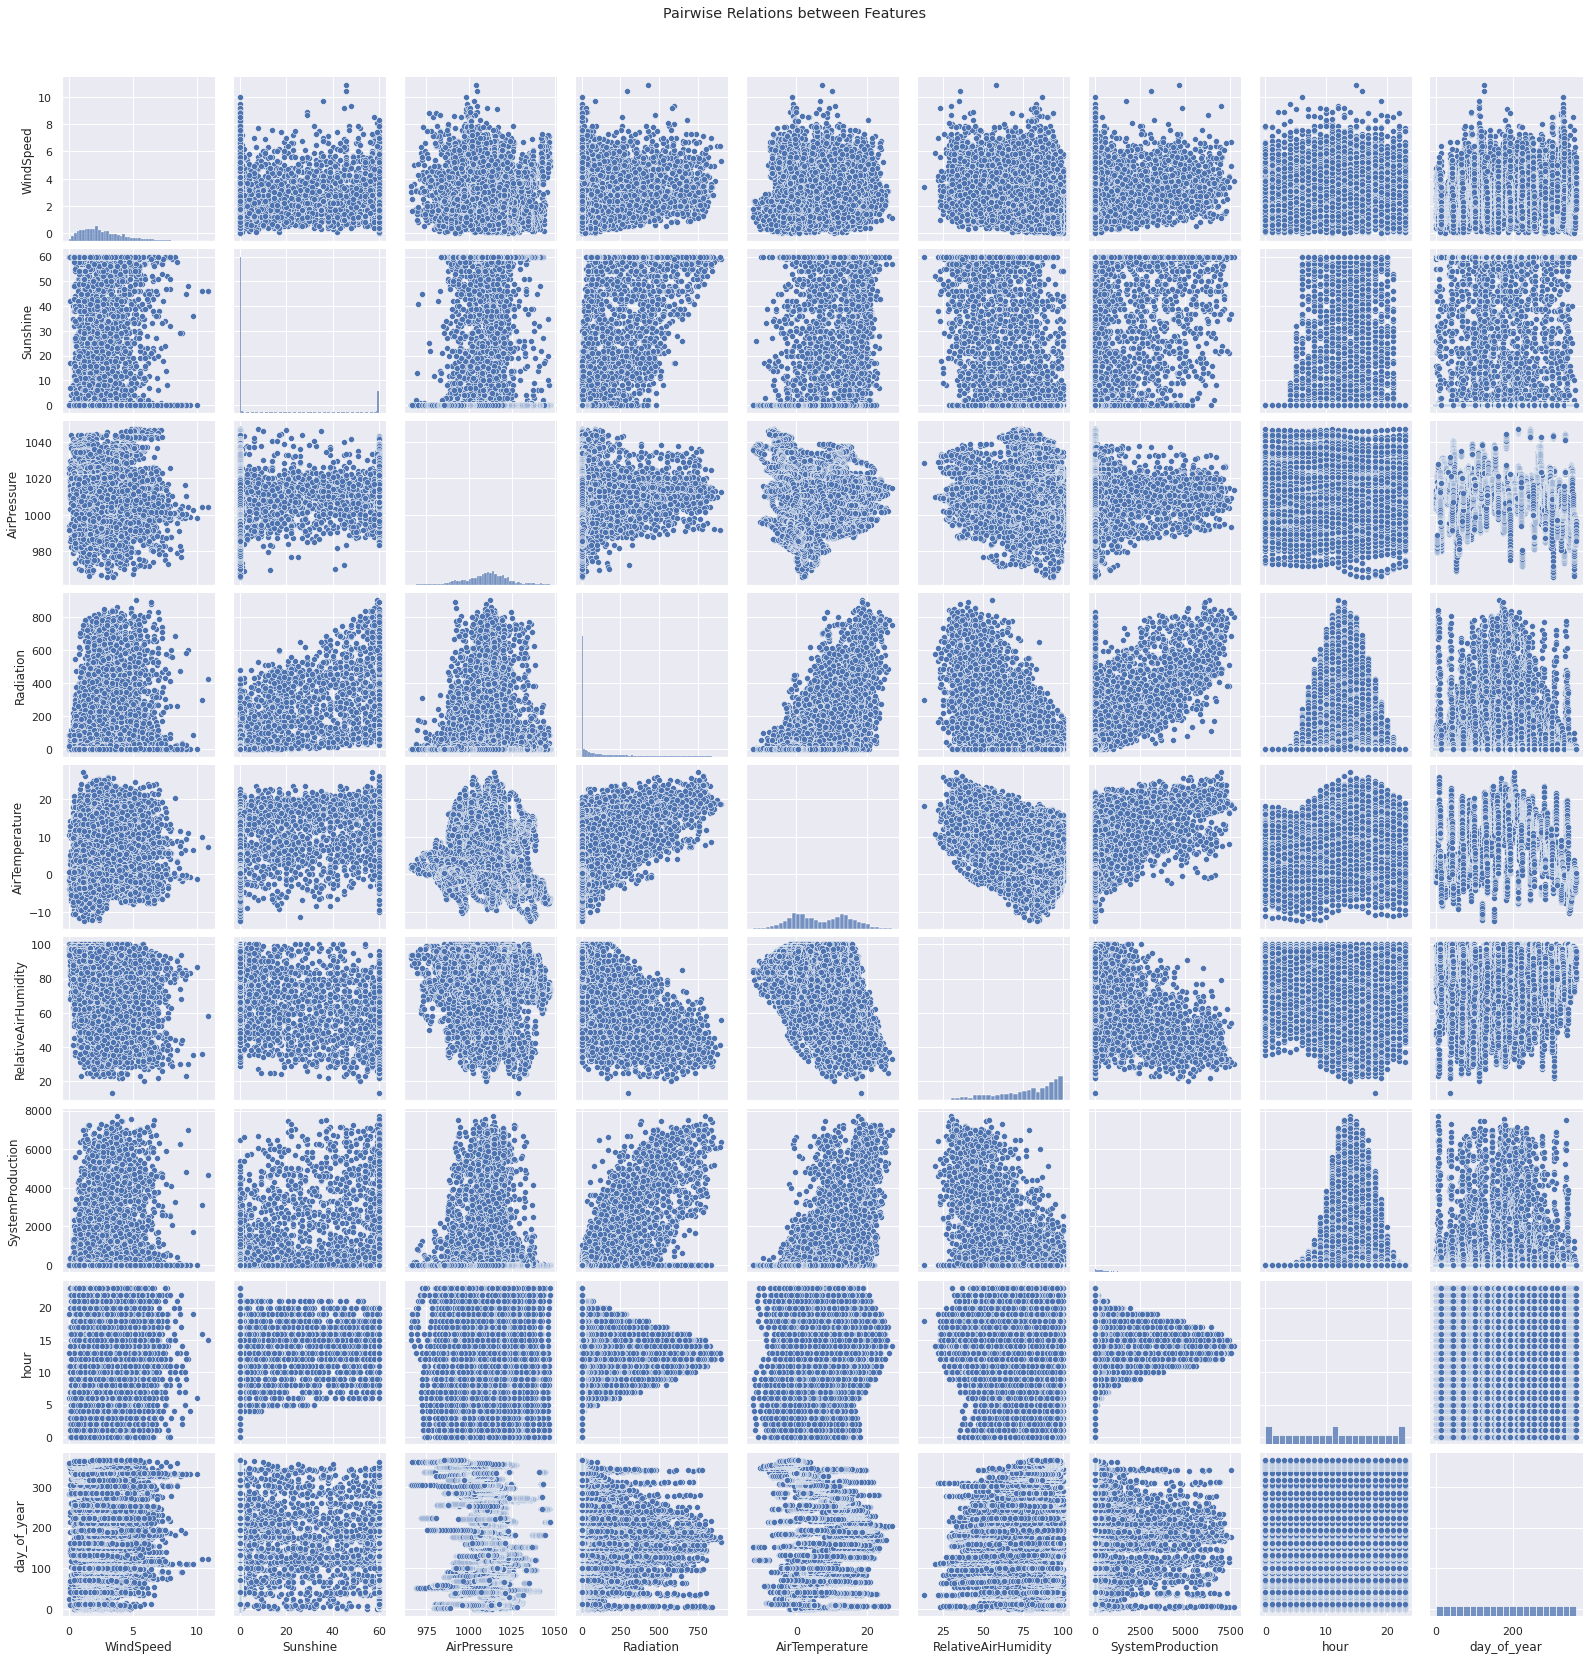

In [ ]:
# plot pairwise relationships of the dataset
sns.set()  # set the seaborn's theme as default
g = sns.pairplot(df);

# set the title
g.fig.suptitle("Pairwise Relations between Features", y=1.03);

The independent varible SystemProduction is highly skewed which might indicates that we might have more time of the year when there is less production of energy.

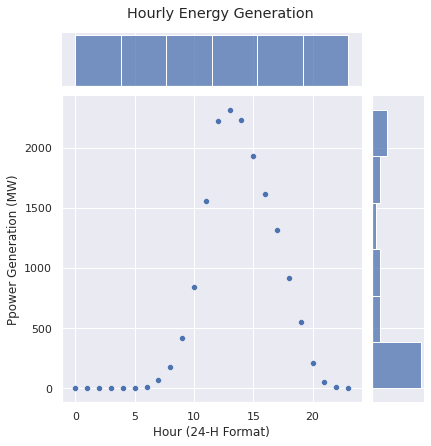

In [ ]:
# check the effect of `hour` and `day_of_year` on the `SystemProduction`
sns.set()
g = sns.jointplot(data=df[["hour", "SystemProduction"]].groupby("hour").mean(), x="hour", y="SystemProduction")
g.set_axis_labels(xlabel=("Hour (24-H Format)"), # set x-label
                  ylabel=("Ppower Generation (MW)"))  # set y-label
g.fig.suptitle("Hourly Energy Generation", y=1.03);  # set the title

Paired with our previous assumption and the dataset's summary, we can say that the high skewness in the SystemProduction's distribution is due to fact that there is mostly low energy generation and no generation at night hours when there is no sun.
The plot also shows that during peak hours, we would have higher average energy generation.

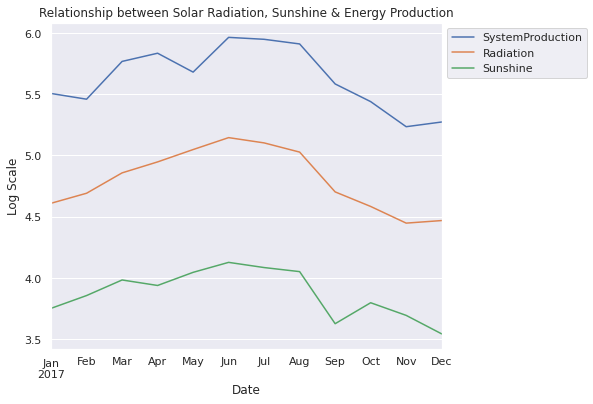

In [ ]:
# check the relationship between `Radiation` and `SystemProduction`
sns.set()
tmp_df = df[["SystemProduction", "Radiation", "Sunshine"]].resample("1M").sum()
tmp_df = tmp_df.agg(np.log10)

# plot the line graph
tmp_df.plot(figsize=(7, 6), xlabel="Date", ylabel="Log Scale");

# set the title
plt.title("Relationship between Solar Radiation, Sunshine & Energy Production");

# set the legend to outside the grid
plt.legend(bbox_to_anchor=(1, 1));

For exploratory data analysis, we need to drop the records (hours) in which there is no generation of any energy SystemProduction < 1 MW. It is due to the fact that the hours at which the Sunshine and Radiation are zero will have no SystemProduction and thus creating useless data points for exploratory data analysis. We could also use Sunshine and Radiation as a mask to filter out the records but sticking to a systematic approach might be more useful when there is a potential noise in those features (like at night hours, there won't be any Sunshine and Radiation).

In [ ]:
# get the `hours` where there is less than 1 MW production
list_ = []
for k, v in (df.groupby("hour").SystemProduction.mean() < 1).to_dict().items():
    if v == True:  # where values are less than 1MW
        list_.append(k)

# save the filtered data frame for EDA as `eda_df`
eda_df = df[~df.hour.isin(list_)]

Solar Energy Generation (Monthly & Quarterly)

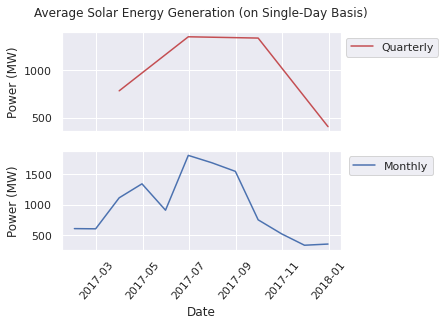

In [ ]:
# plot monthly solar generation
sns.set_context("notebook")
fig , [ax1, ax2] = plt.subplots(2, 1, figsize=(5, 4), sharex=True); # get the subplots

Q = eda_df.SystemProduction.resample("1Q").mean()
M = eda_df.SystemProduction.resample("1M").mean()

sns.lineplot(x=Q.index, y=Q.values, color="r", ax=ax1, label="Quarterly")
sns.lineplot(x=M.index, y=M.values, color="b", ax=ax2, label='Monthly')

# set the title and labels
ax1.set_title("Average Solar Energy Generation (on Single-Day Basis)", y=1.1);
ax1.legend(bbox_to_anchor=(1, 1));  # set the legend to be outside the grid
ax2.legend(bbox_to_anchor=(1.35, 1));  # set the legend to be outside the grid
plt.xticks(rotation=50);
ax1.set_ylabel("Power (MW)");
ax2.set_ylabel("Power (MW)");
plt.xlabel("Date");  # set the shaped

It can be easily inferred that in spring and summer, the production of the energy increases quite significantly when compared to other seasons.

Effect of Wind Speed on Power Generation

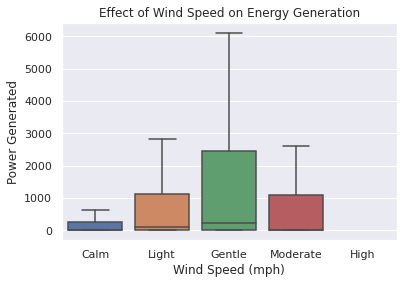

In [ ]:
# plot the power generation with respect to wind speed
sns.set()
tmp_df = eda_df[["WindSpeed", "SystemProduction"]]  # create a temporary data frame
tmp_df.loc[:, "WindSpeed"] = pd.cut(tmp_df.WindSpeed,
                                    bins=[-np.inf, 1, 4, 7, 12, np.inf],  # set bins for a total of 5 labels
                                    labels=['Calm', 'Light', 'Gentle', 'Moderate', 'High']) # set the labels names

sns.boxplot(data=tmp_df,
            x="WindSpeed",
            y="SystemProduction",
            sym="");  # remove the outliers

# set the labels and title
plt.title("Effect of Wind Speed on Energy Generation");
plt.xlabel("Wind Speed (mph)");
plt.ylabel("Power Generated");

The relationship doesn't seem to be linear but it is to some extent positive. According to the article, which states, Wind speed has little influence on solar radiation, which is directly proportional to the atmospheric temperature while it is inversely proportional to the relative humidity. Consequently, the wind does not increase solar irradiance effectively. In other words, appropriate wind can increase just PV efficiency., 

Effect of Air Temperature on Power Generation

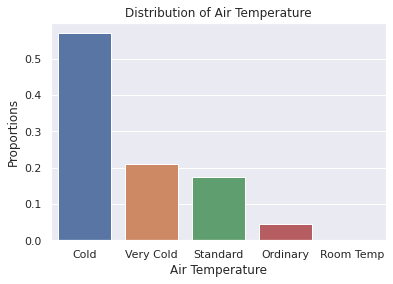

In [ ]:
# check the proportions of the AirTemperature categories
tmp_df.loc[:, "AirTemperature"] = pd.cut(eda_df.AirTemperature,
                                         bins=[-np.inf, 0, 15, 20, 25, 30, np.inf], # get the bins for a total of 6 labels
                                         labels=['Very Cold', 'Cold', 'Standard', 'Ordinary', 'Room Temp', 'Moderate'])\
                                    .cat.remove_unused_categories() # remove the empty categories

sns.set()  # set the seaborn theme to default
sns.barplot(data=tmp_df.AirTemperature.value_counts(normalize=True).to_frame().T)  # plotting a barplot

# set the labels and title
plt.xlabel("Air Temperature")
plt.ylabel("Proportions")
plt.title("Distribution of Air Temperature");


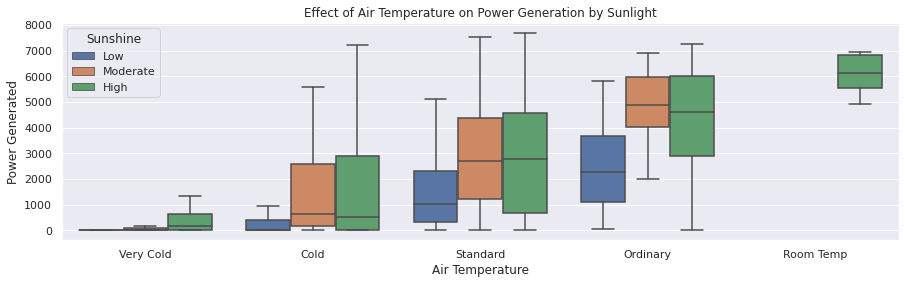

In [ ]:
# Effect of Air Temperature on Power Generation by Sunlight
sns.set()
tmp_df.loc[:, "Sunshine"] = pd.cut(eda_df.Sunshine, bins=3,  # make 3 bins of the data for 3 labels
                                   labels=["Low", "Moderate", "High"]).cat.remove_unused_categories()

plt.subplots(figsize=(15, 4))  # set the figure dimensions
sns.boxplot(data=tmp_df, x="AirTemperature", hue="Sunshine", y="SystemProduction", sym="")  # plot a boxplot with no outliers

# set the labels and title
plt.xlabel("Air Temperature")
plt.ylabel("Power Generated")
plt.title("Effect of Air Temperature on Power Generation by Sunlight");

The Air Temperature might just tell us about the season, and Sunlight both seem to have positive interactive effect on the power generation. But it's important to note that the during low air temperatures which makes up a major part of the year, the mean average generation is low during winter and autumn seasons.

Effect of Air Pressure on Power Generation

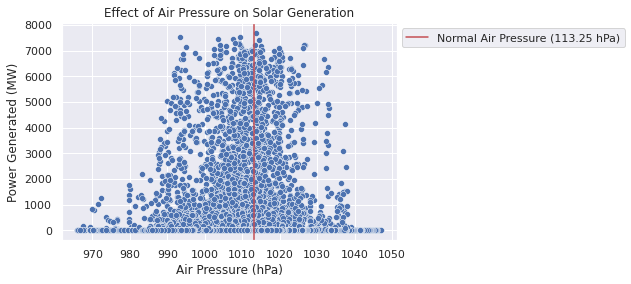

In [ ]:
# plot system production by air pressure
normal_pressure = 1013.25 # the unit is in `hPa`
sns.scatterplot(data=eda_df, x="AirPressure", y="SystemProduction")
plt.axvline(normal_pressure, color="r", label="Normal Air Pressure (113.25 hPa)")
plt.xlabel("Air Pressure (hPa)")
plt.ylabel("Power Generated (MW)")
plt.title("Effect of Air Pressure on Solar Generation")
plt.legend(bbox_to_anchor=(1, 1));

Photo Voltaic Panels seems to be working effectively on normal air pressure. But it is also important to note the interactive effect of Air Pressure and Radiation on power generation before drawing any solid conclusion. Otherwise, we won't have an unbiased estimat

Effect of Relative Air Humidity on Power Generation

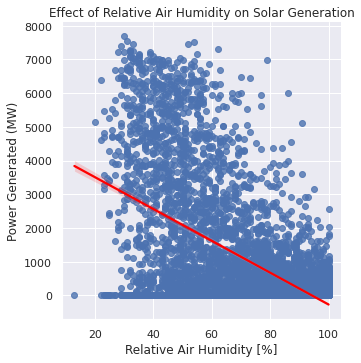

In [ ]:
# plot system production by air pressure
sns.lmplot(data=eda_df, x="RelativeAirHumidity", y="SystemProduction", line_kws={"color": "red"})

# set the labels and title
plt.xlabel("Relative Air Humidity [%]")
plt.ylabel("Power Generated (MW)")
plt.title("Effect of Relative Air Humidity on Solar Generation");

Relative Air Humidity has a negative relationship with Solar Generation.

# Model Building for Predicting Solar Power Generation

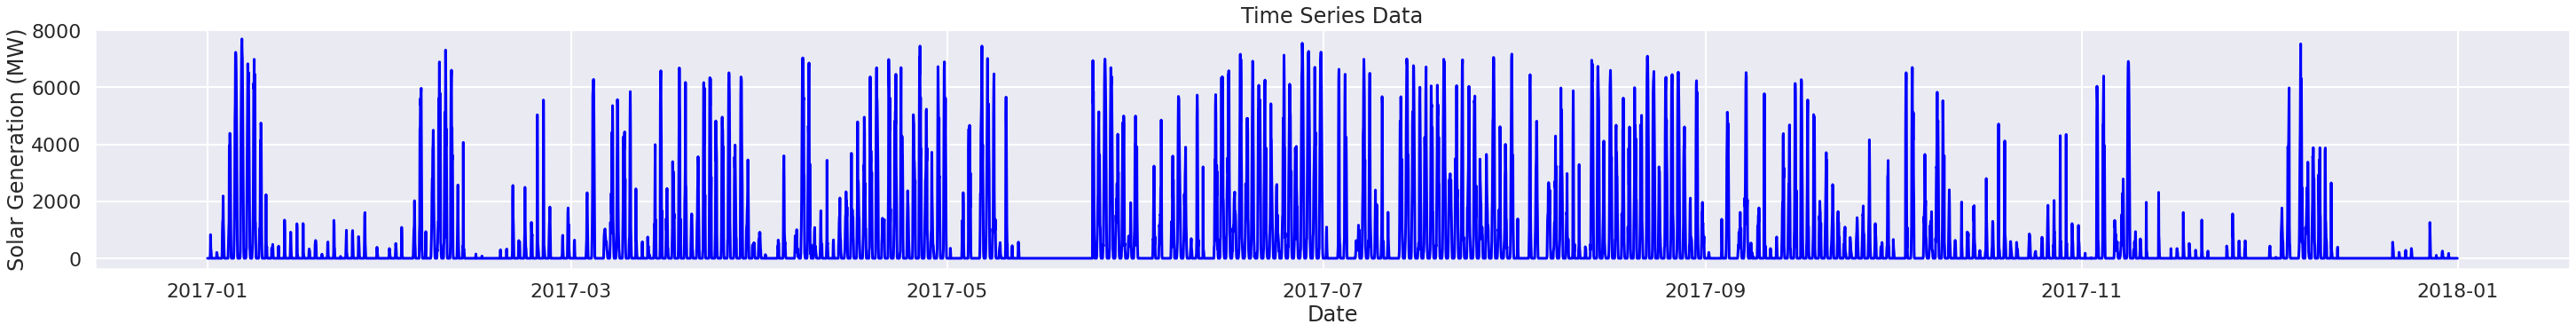

In [ ]:
# plot the time series data
sns.set_context("poster")
plt.subplots(figsize=(50, 5)) # set the figure dimensions
sns.lineplot(x=df.index, y=df.SystemProduction.values, color="blue")

# set the labels and title
plt.xlabel("Date")
plt.ylabel("Solar Generation (MW)")
plt.title("Time Series Data");

Splitting and Preparing the Training and Validation Datasets

In [ ]:
# shape of the data
print(f"There are total of {df.shape[0]} hourly records for a total of {df.day_of_year.nunique()} days.")

There are total of 8760 hourly records for a total of 365 days.


In [ ]:
test_data=df.SystemProduction[-1464:].copy()

In [ ]:
test_data

datetime
2017-01-11 00:00:00    0.0
2017-01-11 01:00:00    0.0
2017-01-11 02:00:00    0.0
2017-01-11 03:00:00    0.0
2017-01-11 04:00:00    0.0
                      ... 
2017-12-31 19:00:00    0.0
2017-12-31 20:00:00    0.0
2017-12-31 21:00:00    0.0
2017-12-31 22:00:00    0.0
2017-12-31 23:00:00    0.0
Name: SystemProduction, Length: 1464, dtype: float64

Let's build a model that will be able to forecast solar generation for the next hour (1 Horizon) by taking previous 24 hours (24 Windows) as its inputs along with the other features. To be able to achieve this, we need to introduce a lag in the dataset by using shifting

In [ ]:
# # let's shift the data
# def prepare_data(df):
#     '''Splits the dataset into (features (pre-defined), windows, horizon).'''
    
#     to_split = df.copy(deep=True) # get a copy of `df`
#     forecast = to_split.SystemProduction  # get the y-values
#     to_split = to_split.shift(1)  # shift the features for current hours to next hour for forcasting
#     to_split.rename({"SystemProduction": "SP_t_1"}, axis=1, inplace=True)  # rename the column for consistency
#     to_split["forecast"] = forecast  #  put the forecast back into the data frame that is to be splitted
    
#     windows = 24  # number of windows
#     # perform windowing
#     for n in range(2, windows+1, 1):
#         to_split[f"SP_t_{n}"] = to_split.forecast.shift(n)
#     to_split.dropna(inplace=True)
    
#     # split the windows from `to-split` to `windows_df`
#     window_cols = []
#     windows_df = pd.DataFrame([], index=to_split.index)
#     for col in to_split.columns:
#         if "SP" in col: # where the windows names are matched
#             windows_df[f"{col}"] = to_split[f"{col}"]
#             to_split.drop(col, axis=1, inplace=True)
    
#     # get the features and horizon from `to_split` and save them
#     columns = to_split.columns.values.tolist()
#     other_feats, horizon = to_split[[cols for cols in columns if cols != "forecast"]], to_split["forecast"]
    
#     return other_feats, windows_df, horizon
# # get the three types of data
# other_feats, windows, horizon = prepare_data(df)

# # check the shapes of the data
# other_feats.shape, windows.shape, horizon.shape

In [ ]:
# # Initialize the MinMaxScaler and transform the features to get the data on the same scale for smooth convergence
# other_feats_mms = other_feats.copy()
# other_feats_mms.loc[:, :] = MinMaxScaler().fit_transform(other_feats)

# # get `other_feats_mms` statistical summary
# other_feats_mms.describe()

In [ ]:
#other_feats_mms.info()

In [ ]:
df.SystemProduction

datetime
2017-01-01 00:00:00    0.0
2017-01-01 01:00:00    0.0
2017-01-01 02:00:00    0.0
2017-01-01 03:00:00    0.0
2017-01-01 04:00:00    0.0
                      ... 
2017-12-31 19:00:00    0.0
2017-12-31 20:00:00    0.0
2017-12-31 21:00:00    0.0
2017-12-31 22:00:00    0.0
2017-12-31 23:00:00    0.0
Name: SystemProduction, Length: 8760, dtype: float64

In [ ]:
# split into standard weeks
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

# # split a univariate dataset into train/test sets
# def split_dataset(data):
# 	# split into standard weeks
# 	train, test = data[:-1464], data[-1464:]
# 	# restructure into windows of weekly data
# 	train = array(split(train, len(train)/24))
# 	test = array(split(test, len(test)/24))
# 	return train, test

# # load the new file

# train, test = split_dataset(other_feats.values)
# # validate train data
# print(train.shape)
# print(train[0, 0, 0], train[-1, -1, 0])
# # validate test
# print(test.shape)
# print(test[0, 0, 0], test[-1, -1, 0])

In [ ]:
train_df,test_df = df[:-1464], df[-1464:] 

In [ ]:
y_train_horizon, y_test_horizon =  df.SystemProduction[:-1464], df.SystemProduction[-1464:] 

In [ ]:
y_test_horizon.head(2000)

datetime
2017-01-11 00:00:00    0.0
2017-01-11 01:00:00    0.0
2017-01-11 02:00:00    0.0
2017-01-11 03:00:00    0.0
2017-01-11 04:00:00    0.0
                      ... 
2017-12-31 19:00:00    0.0
2017-12-31 20:00:00    0.0
2017-12-31 21:00:00    0.0
2017-12-31 22:00:00    0.0
2017-12-31 23:00:00    0.0
Name: SystemProduction, Length: 1464, dtype: float64

In [ ]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

In [ ]:
y_test_horizon.head(2000)

datetime
2017-01-11 00:00:00   -1.0
2017-01-11 01:00:00   -1.0
2017-01-11 02:00:00   -1.0
2017-01-11 03:00:00   -1.0
2017-01-11 04:00:00   -1.0
                      ... 
2017-12-31 19:00:00   -1.0
2017-12-31 20:00:00   -1.0
2017-12-31 21:00:00   -1.0
2017-12-31 22:00:00   -1.0
2017-12-31 23:00:00   -1.0
Name: SystemProduction, Length: 1464, dtype: float64

In [ ]:
def split_series(series, n_past, n_future):
  
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [ ]:
y_test_horizon.head(2000)

datetime
2017-01-11 00:00:00   -1.0
2017-01-11 01:00:00   -1.0
2017-01-11 02:00:00   -1.0
2017-01-11 03:00:00   -1.0
2017-01-11 04:00:00   -1.0
                      ... 
2017-12-31 19:00:00   -1.0
2017-12-31 20:00:00   -1.0
2017-12-31 21:00:00   -1.0
2017-12-31 22:00:00   -1.0
2017-12-31 23:00:00   -1.0
Name: SystemProduction, Length: 1464, dtype: float64

In [ ]:
n_past = 2
n_future = 1
n_features = 9

In [ ]:
X_train, y_train = split_series(train_df.values,n_past, n_future)

In [ ]:
y_test_horizon.head(24)

datetime
2017-01-11 00:00:00   -1.000000
2017-01-11 01:00:00   -1.000000
2017-01-11 02:00:00   -1.000000
2017-01-11 03:00:00   -1.000000
2017-01-11 04:00:00   -1.000000
2017-01-11 05:00:00   -1.000000
2017-01-11 06:00:00   -1.000000
2017-01-11 07:00:00   -1.000000
2017-01-11 08:00:00   -1.000000
2017-01-11 09:00:00   -0.989417
2017-01-11 10:00:00   -0.910228
2017-01-11 11:00:00   -0.941393
2017-01-11 12:00:00   -0.902567
2017-01-11 13:00:00   -0.905121
2017-01-11 14:00:00   -0.873090
2017-01-11 15:00:00   -0.915725
2017-01-11 16:00:00   -0.982946
2017-01-11 17:00:00   -1.000000
2017-01-11 18:00:00   -1.000000
2017-01-11 19:00:00   -1.000000
2017-01-11 20:00:00   -1.000000
2017-01-11 21:00:00   -1.000000
2017-01-11 22:00:00   -1.000000
2017-01-11 23:00:00   -1.000000
Name: SystemProduction, dtype: float64

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test_df.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [ ]:
# E1D1

encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

model_e1d1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 9)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 100),        44000       ['input_1[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector (RepeatVector)   (None, 1, 100)       0           ['lstm[0][0]']                   
                                                                                              

In [ ]:
# E2D2

encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])

decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)

model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)

model_e2d2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2, 9)]       0           []                               
                                                                                                  
 lstm_2 (LSTM)                  [(None, 2, 100),     44000       ['input_2[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_3 (LSTM)                  [(None, 100),        80400       ['lstm_2[0][0]']                 
                                 (None, 100),                                               

In [ ]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

In [ ]:
pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)

46/46 [==============================] - 2s 3ms/step


In [ ]:
pred_e1d1[0][0][0]

-0.7773934

In [ ]:
history_e1d1

In [ ]:
y_test

array([[[-0.87155963, -1.        ,  0.01965602, ..., -1.        ,
         -0.82608696, -0.94169096]],

       [[-0.72477064, -1.        ,  0.00982801, ..., -1.        ,
         -0.73913043, -0.94169096]],

       [[-0.63302752, -1.        , -0.004914  , ..., -1.        ,
         -0.65217391, -0.94169096]],

       ...,

       [[-0.66972477, -1.        , -0.48894349, ..., -1.        ,
          0.82608696,  1.12244898]],

       [[-0.59633028, -1.        , -0.50614251, ..., -1.        ,
          0.91304348,  1.12244898]],

       [[-0.55963303, -1.        , -0.51597052, ..., -1.        ,
          1.        ,  1.12244898]]])

In [ ]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [ ]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,2):
    print("Hour ",j,":")
    print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred_e1d1[:,j-1,index]))
  print()

WindSpeed
Hour  1 :
MAE-E1D1 :  0.7318371908201564

Sunshine
Hour  1 :
MAE-E1D1 :  3.844043444673927

AirPressure
Hour  1 :
MAE-E1D1 :  0.8723769578007449

Radiation
Hour  1 :
MAE-E1D1 :  14.70269384393768

AirTemperature
Hour  1 :
MAE-E1D1 :  0.5703767276880563

RelativeAirHumidity
Hour  1 :
MAE-E1D1 :  2.4636519754308037

SystemProduction
Hour  1 :
MAE-E1D1 :  115.47762675768632

hour
Hour  1 :
MAE-E1D1 :  0.5322982945292168

day_of_year
Hour  1 :
MAE-E1D1 :  4.4273559952565



In [ ]:
from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,2):
    print("Hour ",j,":")
    print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred_e2d2[:,j-1,index]))
  print()

WindSpeed
Hour  1 :
MAE-E2D2 :  0.7250315850516513

Sunshine
Hour  1 :
MAE-E2D2 :  3.641308099316833

AirPressure
Hour  1 :
MAE-E2D2 :  0.9174447327077596

Radiation
Hour  1 :
MAE-E2D2 :  13.590076337574898

AirTemperature
Hour  1 :
MAE-E2D2 :  0.6002304312369496

RelativeAirHumidity
Hour  1 :
MAE-E2D2 :  2.3330473449748785

SystemProduction
Hour  1 :
MAE-E2D2 :  107.6476329020657

hour
Hour  1 :
MAE-E2D2 :  0.22073429570152397

day_of_year
Hour  1 :
MAE-E2D2 :  3.8938704815511014



In [ ]:
for i in range(0,9):
  print(pred_e1d1[0][0][i])

1.2132059
0.5274868
1007.0408
11.161859
2.9309676
88.9543
31.156816
1.971549
14.302574


In [ ]:
y_test_horizon

datetime
2017-01-11 00:00:00   -1.0
2017-01-11 01:00:00   -1.0
2017-01-11 02:00:00   -1.0
2017-01-11 03:00:00   -1.0
2017-01-11 04:00:00   -1.0
                      ... 
2017-12-31 19:00:00   -1.0
2017-12-31 20:00:00   -1.0
2017-12-31 21:00:00   -1.0
2017-12-31 22:00:00   -1.0
2017-12-31 23:00:00   -1.0
Name: SystemProduction, Length: 1464, dtype: float64

In [ ]:
x = len(pred_e1d1)
y= len(pred_e1d1[0])
z = len(pred_e1d1[0][0])

In [ ]:
print(x,y,z)


1462 1 9


In [ ]:
c=[]
#for i in pred_e1d1:
  #for j in range(0,1):
    #a=pred_e1d1[0][j][6]
  #c.append(a)
for i in range(0,x):
 for j in range(0,7):
   a=pred_e1d1[i][0][6]
 c.append(a)  
    

In [ ]:
c

[31.156816,
 38.937355,
 8.925783,
 24.788895,
 53.711914,
 72.75164,
 76.64868,
 57.708332,
 183.83519,
 579.1092,
 340.4175,
 547.11053,
 503.82214,
 648.6429,
 462.33612,
 83.243126,
 -20.724545,
 -24.835026,
 -86.12414,
 60.80026,
 96.24428,
 -23.85457,
 -61.674225,
 -51.931164,
 61.705437,
 15.736653,
 32.64288,
 86.41974,
 88.8438,
 64.07005,
 88.095375,
 93.01648,
 143.71748,
 967.2923,
 1049.2047,
 4122.6885,
 935.38934,
 533.3919,
 192.04033,
 -44.219704,
 167.06874,
 -3.5936313,
 -92.33553,
 80.36028,
 1.1399647,
 14.273771,
 -38.304832,
 21.37405,
 46.205177,
 49.56884,
 -18.47904,
 8.2670965,
 28.46492,
 11.531155,
 28.808723,
 20.667397,
 34.273758,
 507.13028,
 782.9747,
 2674.0288,
 856.37695,
 607.6028,
 95.998474,
 -204.78236,
 10.23719,
 -54.833977,
 -140.62671,
 -61.16839,
 88.1259,
 -46.489536,
 -100.90351,
 -83.77673,
 10.280337,
 7.3343773,
 33.98596,
 29.398329,
 16.374914,
 39.73834,
 28.381838,
 39.781715,
 109.04989,
 499.74634,
 988.5474,
 3762.3975,
 676.785

In [ ]:
# for i in c:
#    if c[i]<0:
#        c[i]=0 * c[i] 
c = [0 if ele<0 else ele for ele in c]

In [ ]:
c

[31.156816,
 38.937355,
 8.925783,
 24.788895,
 53.711914,
 72.75164,
 76.64868,
 57.708332,
 183.83519,
 579.1092,
 340.4175,
 547.11053,
 503.82214,
 648.6429,
 462.33612,
 83.243126,
 0,
 0,
 0,
 60.80026,
 96.24428,
 0,
 0,
 0,
 61.705437,
 15.736653,
 32.64288,
 86.41974,
 88.8438,
 64.07005,
 88.095375,
 93.01648,
 143.71748,
 967.2923,
 1049.2047,
 4122.6885,
 935.38934,
 533.3919,
 192.04033,
 0,
 167.06874,
 0,
 0,
 80.36028,
 1.1399647,
 14.273771,
 0,
 21.37405,
 46.205177,
 49.56884,
 0,
 8.2670965,
 28.46492,
 11.531155,
 28.808723,
 20.667397,
 34.273758,
 507.13028,
 782.9747,
 2674.0288,
 856.37695,
 607.6028,
 95.998474,
 0,
 10.23719,
 0,
 0,
 0,
 88.1259,
 0,
 0,
 0,
 10.280337,
 7.3343773,
 33.98596,
 29.398329,
 16.374914,
 39.73834,
 28.381838,
 39.781715,
 109.04989,
 499.74634,
 988.5474,
 3762.3975,
 676.7856,
 513.9262,
 118.61347,
 0,
 0,
 0,
 0,
 26.239155,
 85.60751,
 0,
 0,
 0,
 1.0325551,
 0,
 9.208077,
 28.024265,
 47.75229,
 95.97621,
 71.40856,
 99.327

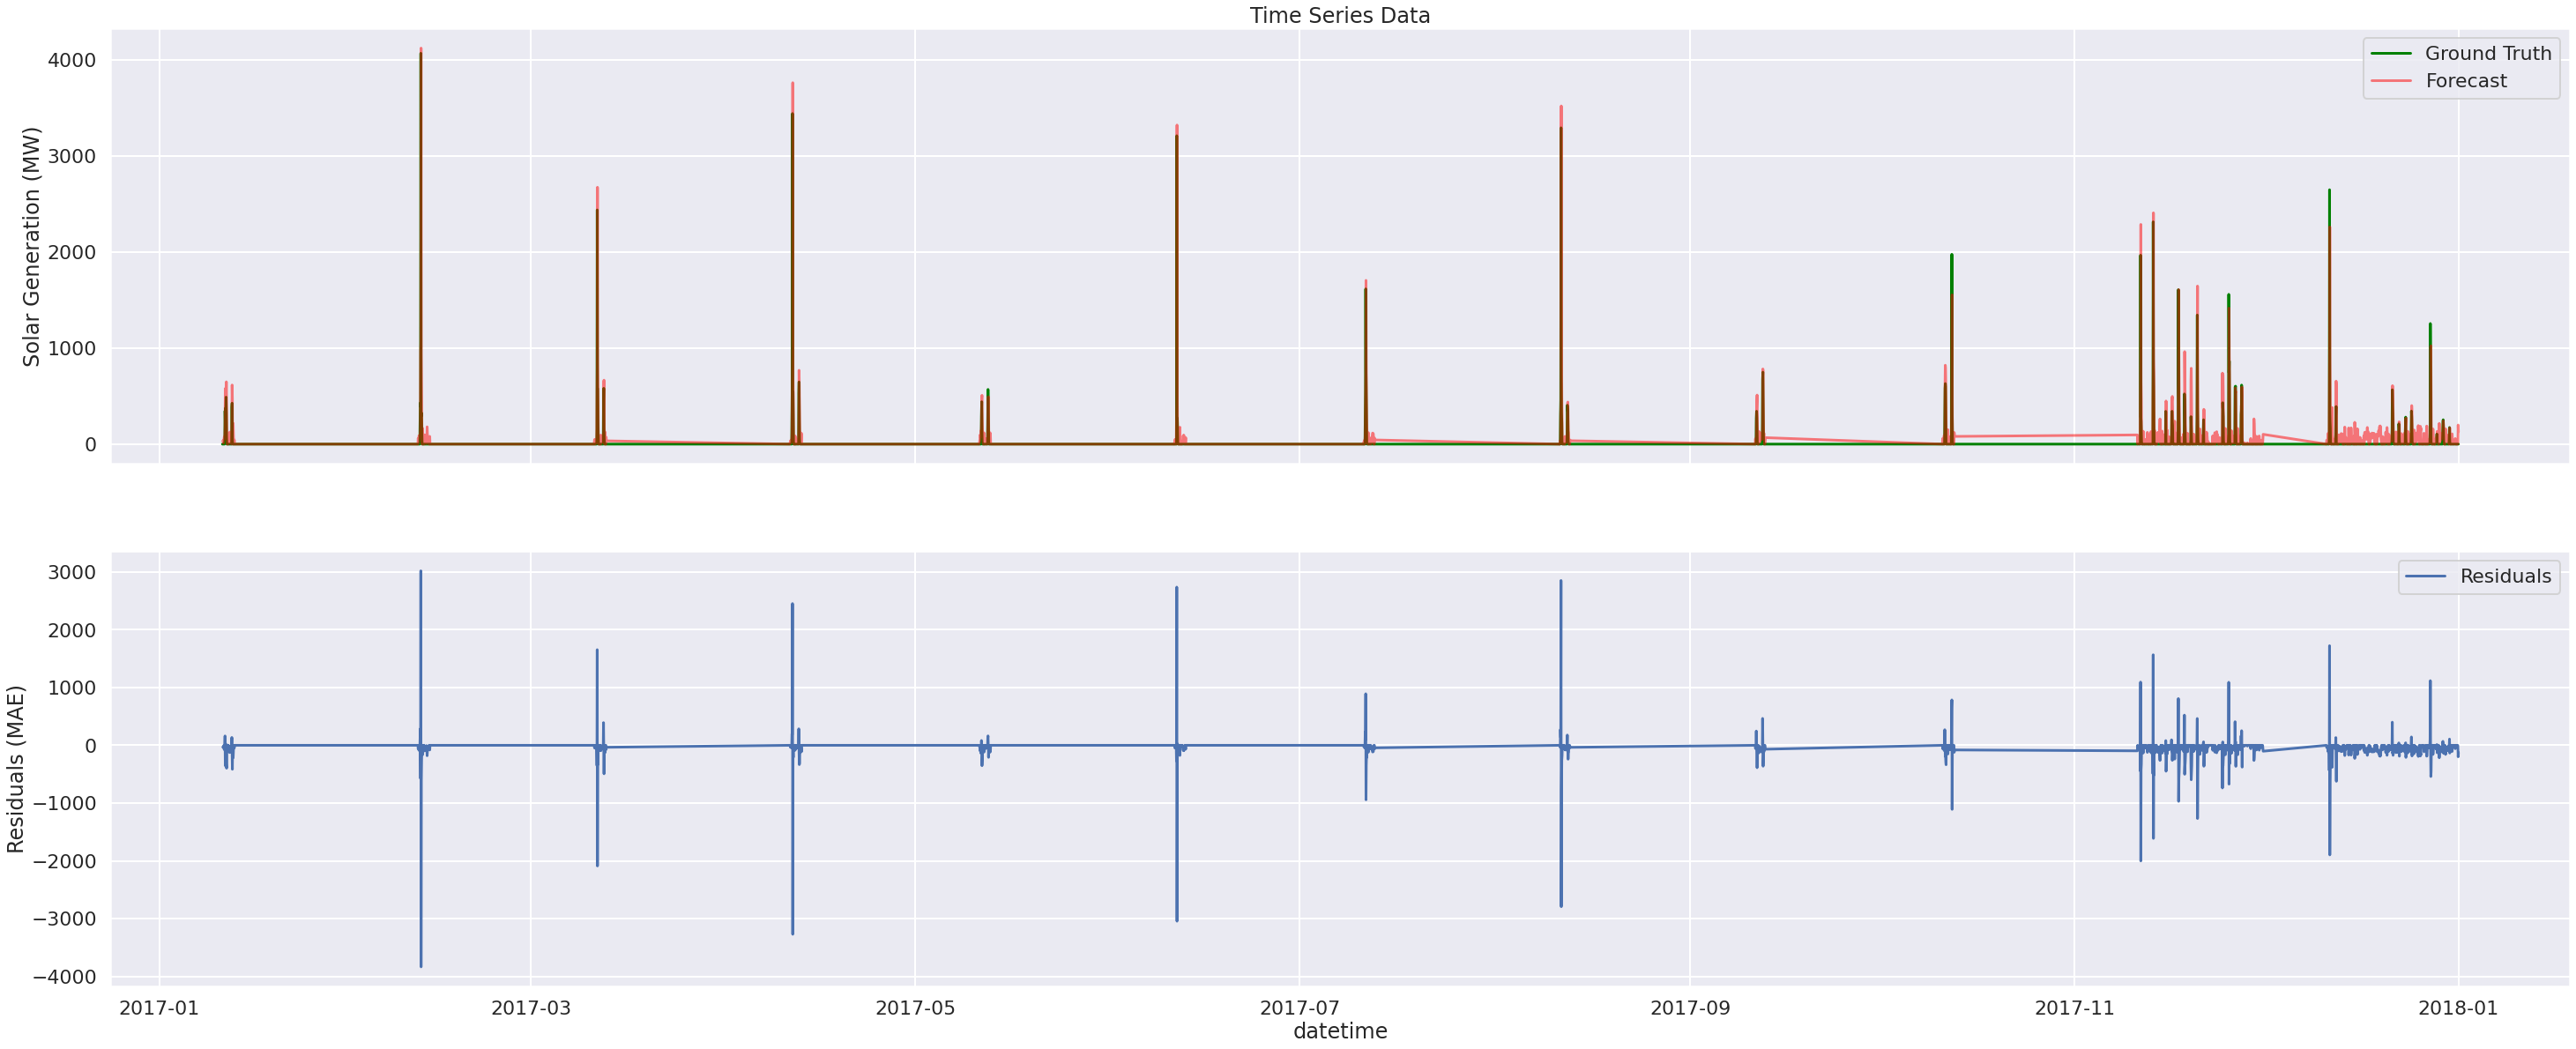

In [ ]:
# plot the ground-truth and forecast and compare them with residuals
sns.set_context("poster")
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(50, 20), sharex=True) # get the figure dimensions for the two figures and plot on the same x-axis
sns.lineplot(x=df.index[-1464:], y=test_data, color="green", ax=ax1, label="Ground Truth") # get the ground-truth validation data
sns.lineplot(x=y_test_horizon.index[2:], y=c, color="red", dashes=True, ax=ax1, label="Forecast", alpha=0.5)  # get the forecast
# set the axis labels and title
ax1.set_xlabel("Date")
ax1.set_ylabel("Solar Generation (MW)")
ax1.set_title("Time Series Data");  
# plot the residuals
residuals = (test_data[2:] - c)
sns.lineplot(y=residuals, x=y_test_horizon.index[2:], ax=ax2, label="Residuals")
ax2.set_ylabel("Residuals (MAE)"); # set the y-label for residuals